In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
import plotly.express as px
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Leukemia.csv")

In [3]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [4]:
X = data.drop('type', axis = 'columns')
Y = data['type']
feature_names = X.columns
X.head()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,4.664924,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,5.171835,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,4.775709,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,4.829844,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,5.245049,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [5]:
Y.head()

0    Bone_Marrow_CD34
1    Bone_Marrow_CD34
2    Bone_Marrow_CD34
3    Bone_Marrow_CD34
4    Bone_Marrow_CD34
Name: type, dtype: object

In [6]:
Y.replace("AML", 0, inplace = True)
Y.replace("Bone_Marrow", 1, inplace = True)
Y.replace("Bone_Marrow_CD34", 2, inplace = True)
Y.replace("PB", 3, inplace = True)
Y.replace("PBSC_CD34", 4, inplace = True)
Y.unique()

array([2, 1, 0, 3, 4])

- 0 -> AML
- 1 -> Bone_Marrow
- 2 -> Bone_Marrow_CD34
- 3 -> PB
- 4 -> PBSC_CD34

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 42)

Prvo moramo podeliti podatke na trening i test skupove.

In [8]:
def IQR(data, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    for name in feature_names:

        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])    
    return iqr

In [9]:
X_IQR = IQR(X_train, feature_names)

In [10]:
X_IQR

,lower,min,num_lower,upper,max,num_upper,percantage
samples,-30.500000,1.000000,0,95.500000,64.000000,0,0
1007_s_at,7.312313,7.278076,1,8.349242,8.167701,0,2
1053_at,5.864327,6.103252,0,7.568242,7.962858,2,3
117_at,4.768255,6.296965,0,9.760061,11.816433,3,5
121_at,8.378204,8.486306,0,9.410547,9.458264,1,2
...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,4.356748,4.401563,0,4.788716,5.047613,3,5
AFFX-ThrX-M_at,3.720476,3.803410,0,4.155451,4.188348,2,3
AFFX-TrpnX-3_at,3.482326,3.517559,0,3.775950,3.951433,3,5
AFFX-TrpnX-5_at,3.974609,4.002604,0,4.296875,4.403250,3,5


In [11]:
count = 0
for i in range(0, 22284):
    if X_IQR.iloc[[i]]['percantage'][0] > 10:
        count+=1
count

844

In [12]:
count = 0
for i in range(0, 22284):
    if X_IQR.iloc[[i]]['percantage'][0] > 5:
        count+=1
count

3849

Veliki broj atributa ima mnogo autlajera, ali da li su ovi autlajeri u stvari najbintniji za odredjivanje tipa leukemije? Mislim da zamenom tih atributa medijanom ne postizemo nista, jer ako je informacija da je taj atribut van granica bitna za odredjivanje tipa leukemije, tom zamenom cemo to izgubiti, a ako je taj atribut totalno nebitan za tip leukemije onda bilo kakva promena na tom atributu nece nista postici. Tako da cemo probati 2 pristupa:
- Probacemo da istreniramo model na normalizovanim podacima bez ikakvih dodatnih promena
- Probacemo da istreniramo model na normalizovanim podacima iz kojih smo prethodno izbacili atribute koji imaju mnogo autlajera


In [13]:
count = 0
for i in range(0, 22284):
    if X_IQR.iloc[[i]]['max'][0] - X_IQR.iloc[[i]]['min'][0] > 8:
        print(X_IQR.iloc[[i]])
        count += 1
count

         lower  min  num_lower  upper   max  num_upper  percantage
samples  -30.5  1.0          0   95.5  64.0          0           0
                lower       min  num_lower      upper       max  num_upper  \
204006_s_at  0.079993  4.741182          0  13.489493  12.82805          0   

             percantage  
204006_s_at           0  
                lower       min  num_lower      upper        max  num_upper  \
204620_s_at -2.293858  5.309427          0  20.402726  13.611774          0   

             percantage  
204620_s_at           0  
              lower       min  num_lower      upper        max  num_upper  \
204959_at -0.757731  4.353141          0  16.792625  12.613058          0   

           percantage  
204959_at           0  
              lower       min  num_lower      upper        max  num_upper  \
204971_at  2.203879  3.823154          0  15.746418  11.877034          0   

           percantage  
204971_at           0  
               lower       min  num_lowe

11

In [14]:
count = 0
for i in range(0, 22284):
    if X_IQR.iloc[[i]]['max'][0] - X_IQR.iloc[[i]]['min'][0] > 9:
        print(X_IQR.iloc[[i]])
        count += 1
count

         lower  min  num_lower  upper   max  num_upper  percantage
samples  -30.5  1.0          0   95.5  64.0          0           0


1

Ovo deluje normalno, ni jedan atribut nema razliku izmedju minimuma i maksimuma vecu od 9. To deluje kao neki razuman raspon vrednosti za ovaj skup podataka. Zbog ovoga bih pretpostavio da 'nema' tj. nije dolazilo do gresaka pri unosu podataka, tj da su svi ovi autlajeri prirodni.

Ovaj zakljucak nam sada dovodi u pitanje poentu treniranja modela sa izbacenim autlajerima ako su oni prirodno nastali, a ne zbog neke greske. Svakako, treniracemo oba modela iz radoznalosti :) </br>
Ocekivanje bi bilo da drugi model ima istu ili cak manju preciznost u opstem slucaju, jer, kao sto je gore navedeno, ti autlajeri samo mogu da pomognu (jer su prirodni).

# Normalizacija i KNN

## Prvo cemo probati sa normalizovanim podacima bez prethodnog dropovanja atributa

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [16]:
def report(model, x, y, text = 'training'):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['AML', 1, 2, 3, 4], index=[0, 1, 2, 3, 4]))
    print("---------------------------------------------------------------------------------")

In [17]:
knn1 = KNeighborsClassifier()

In [18]:
knn1.fit(X_train_norm, Y_train)

KNeighborsClassifier()

In [19]:
report(knn1, X_train_norm, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       0.73      1.00      0.84         8

    accuracy                           0.92        51
   macro avg       0.92      0.96      0.94        51
weighted avg       0.94      0.92      0.92        51

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   AML  1  2  3  4
0   17  1  0  0  3
1    0  8  0  0  0
2    0  0  6  0  0
3    0  0  0  8  0
4    0  0  0  0  8
---------------

In [20]:
report(knn1, X_test_norm, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2

    accuracy                           0.69        13
   macro avg       0.77      0.78      0.73        13
weighted avg       0.74      0.69      0.67        13

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   AML  1  2  3  4
0    2  2  0  0  1
1    0  2  0  0  0
2    1  0  1  0  0
3    0  0  0  2  0
4    0  0  0  0  2
-----------------------

Ovaj tip modela tacno klasifikuje tip leukemije u skoro 70% slucajeva, kasnije cemo probati da poboljsamo ovu tacnost podesavanjem hiper-parametara.

## Sada cemo da probamo sa podacima iz kojih smo izbacili neke atribute

Izbacicemo, recimo, sve atribute koji imaju preko 5% autlajera.

In [21]:
X2 = X
def drop_att_with_many_outliers(df, fn, x):
    df2 = df
    df_IQR = IQR(df2, fn)
    df_IQR
    for i in range(1, 22284):
        if df_IQR.iloc[[i]]['percantage'][0] > 5:
            x = x.drop(df_IQR.iloc[[i]].index[0], axis = "columns")
    return x
        

In [22]:
X2 = drop_att_with_many_outliers(X_train, feature_names, X2)

In [23]:
X2.shape

(64, 18435)

In [24]:
X.shape

(64, 22284)

In [25]:
X_train_no_outliers, X_test_no_outliers, Y_train_no_outliers, Y_test_no_outliers = train_test_split(X2 ,Y, test_size = 0.2, stratify = Y, random_state = 42)

In [26]:
scaler1 = MinMaxScaler()
scaler1.fit(X_train_no_outliers)
X_train_norm1 = scaler1.transform(X_train_no_outliers)
X_test_norm1 = scaler1.transform(X_test_no_outliers)

In [27]:
knn2 = KNeighborsClassifier()

In [28]:
knn2.fit(X_train_norm1, Y_train_no_outliers)

KNeighborsClassifier()

In [29]:
report(knn2, X_train_norm1, Y_train_no_outliers)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       0.73      1.00      0.84         8

    accuracy                           0.92        51
   macro avg       0.92      0.96      0.94        51
weighted avg       0.94      0.92      0.92        51

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   AML  1  2  3  4
0   17  1  0  0  3
1    0  8  0  0  0
2    0  0  6  0  0
3    0  0  0  8  0
4    0  0  0  0  8
---------------

In [30]:
report(knn2, X_test_norm1, Y_test_no_outliers)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2

    accuracy                           0.69        13
   macro avg       0.77      0.78      0.73        13
weighted avg       0.74      0.69      0.67        13

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   AML  1  2  3  4
0    2  2  0  0  1
1    0  2  0  0  0
2    1  0  1  0  0
3    0  0  0  2  0
4    0  0  0  0  2
---------------

Dakle ovaj model je identican nasem prvom modelu. Drugim recima, atributi koji imaju mnogo autlajera, uopste ne uticu na odluku. </br>
Na dalje cemo se baviti samo prvim modelom.

## Podesavanje hiper-parametara

In [31]:
params= {'n_neighbors': range(1, 20, 1), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [32]:
estimator = GridSearchCV(KNeighborsClassifier(), params, cv = 6, verbose=4)
estimator.fit(X_train_norm, Y_train)

Fitting 6 folds for each of 76 candidates, totalling 456 fits
[CV 1/6] END n_neighbors=1, p=1, weights=uniform;, score=0.778 total time=   0.0s
[CV 2/6] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/6] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/6] END n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/6] END n_neighbors=1, p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 6/6] END n_neighbors=1, p=1, weights=uniform;, score=0.875 total time=   0.0s
[CV 1/6] END n_neighbors=1, p=1, weights=distance;, score=0.778 total time=   0.0s
[CV 2/6] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.1s
[CV 3/6] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/6] END n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 5/6] END n_neighbors=1, p=1, weights=distance;, score=0.750 total time=   0.0s
[CV 6/6] END n_neighbors=1, p=1

[CV 4/6] END n_neighbors=5, p=1, weights=distance;, score=0.750 total time=   0.1s
[CV 5/6] END n_neighbors=5, p=1, weights=distance;, score=0.750 total time=   0.0s
[CV 6/6] END n_neighbors=5, p=1, weights=distance;, score=0.875 total time=   0.0s
[CV 1/6] END n_neighbors=5, p=2, weights=uniform;, score=0.889 total time=   0.1s
[CV 2/6] END n_neighbors=5, p=2, weights=uniform;, score=1.000 total time=   0.1s
[CV 3/6] END n_neighbors=5, p=2, weights=uniform;, score=1.000 total time=   0.1s
[CV 4/6] END n_neighbors=5, p=2, weights=uniform;, score=0.750 total time=   0.1s
[CV 5/6] END n_neighbors=5, p=2, weights=uniform;, score=0.625 total time=   0.1s
[CV 6/6] END n_neighbors=5, p=2, weights=uniform;, score=0.875 total time=   0.1s
[CV 1/6] END n_neighbors=5, p=2, weights=distance;, score=0.889 total time=   0.1s
[CV 2/6] END n_neighbors=5, p=2, weights=distance;, score=1.000 total time=   0.1s
[CV 3/6] END n_neighbors=5, p=2, weights=distance;, score=1.000 total time=   0.1s
[CV 4/6] E

[CV 2/6] END n_neighbors=9, p=2, weights=uniform;, score=1.000 total time=   0.1s
[CV 3/6] END n_neighbors=9, p=2, weights=uniform;, score=0.889 total time=   0.1s
[CV 4/6] END n_neighbors=9, p=2, weights=uniform;, score=0.875 total time=   0.1s
[CV 5/6] END n_neighbors=9, p=2, weights=uniform;, score=0.750 total time=   0.1s
[CV 6/6] END n_neighbors=9, p=2, weights=uniform;, score=0.875 total time=   0.1s
[CV 1/6] END n_neighbors=9, p=2, weights=distance;, score=0.667 total time=   0.1s
[CV 2/6] END n_neighbors=9, p=2, weights=distance;, score=1.000 total time=   0.1s
[CV 3/6] END n_neighbors=9, p=2, weights=distance;, score=0.889 total time=   0.1s
[CV 4/6] END n_neighbors=9, p=2, weights=distance;, score=0.875 total time=   0.1s
[CV 5/6] END n_neighbors=9, p=2, weights=distance;, score=0.750 total time=   0.2s
[CV 6/6] END n_neighbors=9, p=2, weights=distance;, score=0.875 total time=   0.2s
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 2/6] 

[CV 6/6] END n_neighbors=13, p=2, weights=uniform;, score=0.750 total time=   0.1s
[CV 1/6] END n_neighbors=13, p=2, weights=distance;, score=0.667 total time=   0.1s
[CV 2/6] END n_neighbors=13, p=2, weights=distance;, score=0.889 total time=   0.1s
[CV 3/6] END n_neighbors=13, p=2, weights=distance;, score=0.778 total time=   0.1s
[CV 4/6] END n_neighbors=13, p=2, weights=distance;, score=0.875 total time=   0.1s
[CV 5/6] END n_neighbors=13, p=2, weights=distance;, score=0.625 total time=   0.1s
[CV 6/6] END n_neighbors=13, p=2, weights=distance;, score=0.875 total time=   0.1s
[CV 1/6] END n_neighbors=14, p=1, weights=uniform;, score=0.556 total time=   0.0s
[CV 2/6] END n_neighbors=14, p=1, weights=uniform;, score=0.778 total time=   0.0s
[CV 3/6] END n_neighbors=14, p=1, weights=uniform;, score=0.778 total time=   0.0s
[CV 4/6] END n_neighbors=14, p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/6] END n_neighbors=14, p=1, weights=uniform;, score=0.500 total time=   0.0

[CV 4/6] END n_neighbors=17, p=2, weights=distance;, score=0.625 total time=   0.1s
[CV 5/6] END n_neighbors=17, p=2, weights=distance;, score=0.500 total time=   0.1s
[CV 6/6] END n_neighbors=17, p=2, weights=distance;, score=0.875 total time=   0.2s
[CV 1/6] END n_neighbors=18, p=1, weights=uniform;, score=0.444 total time=   0.1s
[CV 2/6] END n_neighbors=18, p=1, weights=uniform;, score=0.556 total time=   0.0s
[CV 3/6] END n_neighbors=18, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 4/6] END n_neighbors=18, p=1, weights=uniform;, score=0.500 total time=   0.0s
[CV 5/6] END n_neighbors=18, p=1, weights=uniform;, score=0.375 total time=   0.0s
[CV 6/6] END n_neighbors=18, p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 1/6] END n_neighbors=18, p=1, weights=distance;, score=0.556 total time=   0.0s
[CV 2/6] END n_neighbors=18, p=1, weights=distance;, score=0.667 total time=   0.0s
[CV 3/6] END n_neighbors=18, p=1, weights=distance;, score=1.000 total time=   0.0

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [33]:
estimator.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}

In [34]:
estimator.best_score_

0.9189814814814815

In [35]:
report(estimator.best_estimator_, X_train_norm, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   AML  1  2  3  4
0   21  0  0  0  0
1    0  8  0  0  0
2    0  0  6  0  0
3    0  0  0  8  0
4    0  0  0  0  8
---------------

In [36]:
report(estimator.best_estimator_, X_test_norm, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      1.00      1.00         2
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2

    accuracy                           0.77        13
   macro avg       0.82      0.82      0.81        13
weighted avg       0.80      0.77      0.78        13

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   AML  1  2  3  4
0    3  0  2  0  0
1    0  2  0  0  0
2    1  0  1  0  0
3    0  0  0  2  0
4    0  0  0  0  2
-----------------------

Dakle, uspeli smo da povecamo preciznost naseg modela na 77%.

## BaggingClassifier

In [37]:
baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKnn.fit(X_train_norm, Y_train)

report(baggingKnn, X_train_norm, Y_train)
report(baggingKnn, X_test_norm, Y_test, "test")

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       0.73      1.00      0.84         8

    accuracy                           0.92        51
   macro avg       0.92      0.96      0.94        51
weighted avg       0.94      0.92      0.92        51

---------------------------------------------------------------------------------
Confusion matrix for model BaggingClassifier on training data 
---------------------------------------------------------------------------------
   AML  1  2  3  4
0   17  1  0  0  3
1    0  8  0  0  0
2    0  0  6  0  0
3    0  0  0  8  0
4    0  0  0  0  8
---------------------

## Poredjenje modela

Poredjenje cemo raditi ROC krivom, ali moracemo da napravimo izmene standardnoj metodi jer se ona inace koristi za binarnu klasifikaciju.

Koristicemo OvR (One vs Rest - Jedan naspram Ostalih) metodu za evaluaciju modela. Tj. mericemo razdvojenost svake klase zasebno od svih ostalih klasa.

In [72]:
classes = knn1.classes_
classes

array([0, 1, 2, 3, 4])

In [89]:
def calculate_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    tpr =  TP/(TP + FN)
    fpr = 1 - TN/(TN+FP)
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

tacnost: 0.6923
Histogrami i ROC krive:


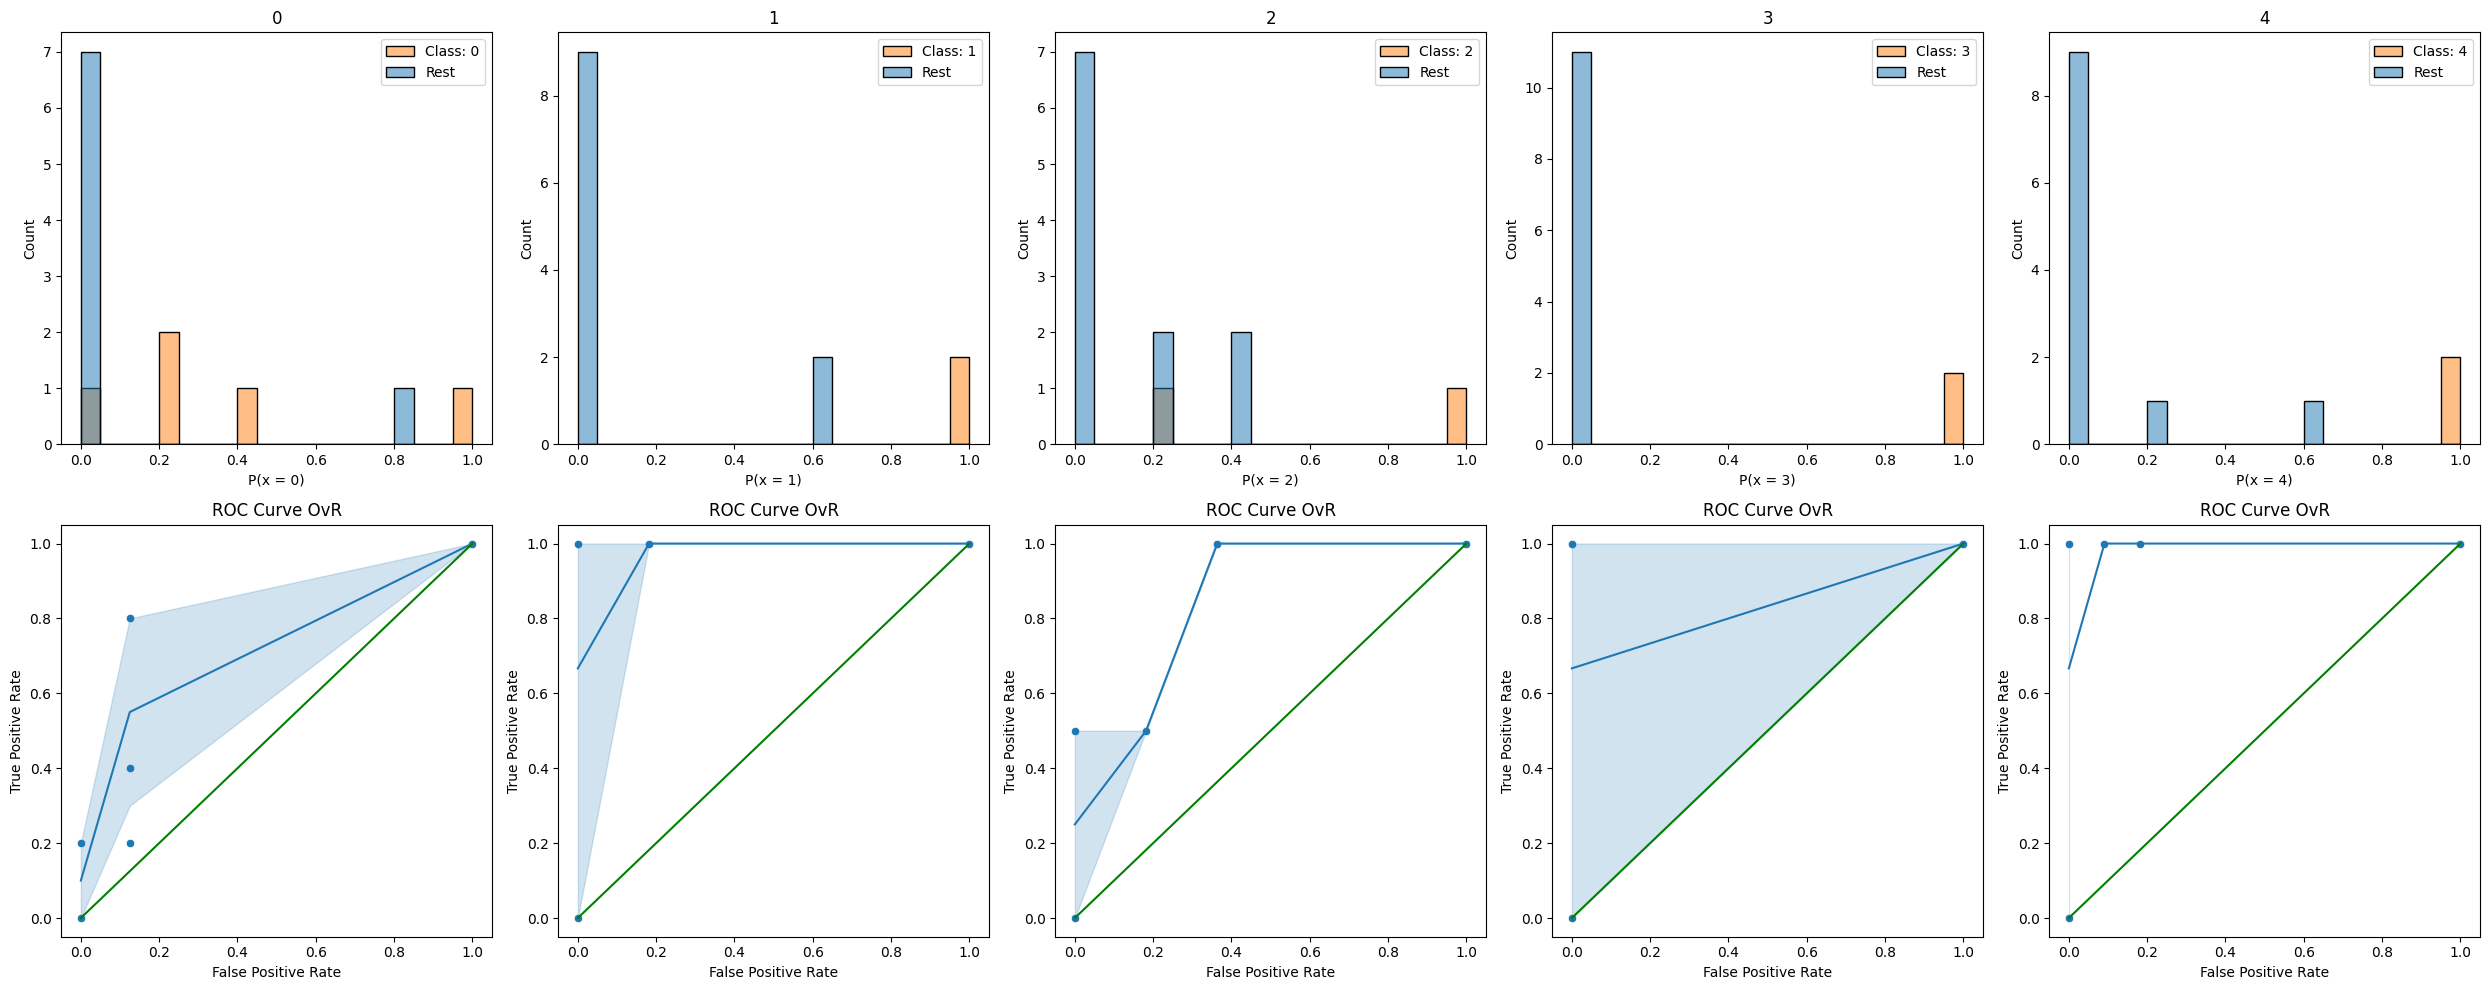

In [98]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = knn1.predict(X_test_norm)
y_proba = knn1.predict_proba(X_test_norm)
print("tacnost: %.4f" % accuracy_score(Y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in Y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 0.7692
Histogrami i ROC krive:


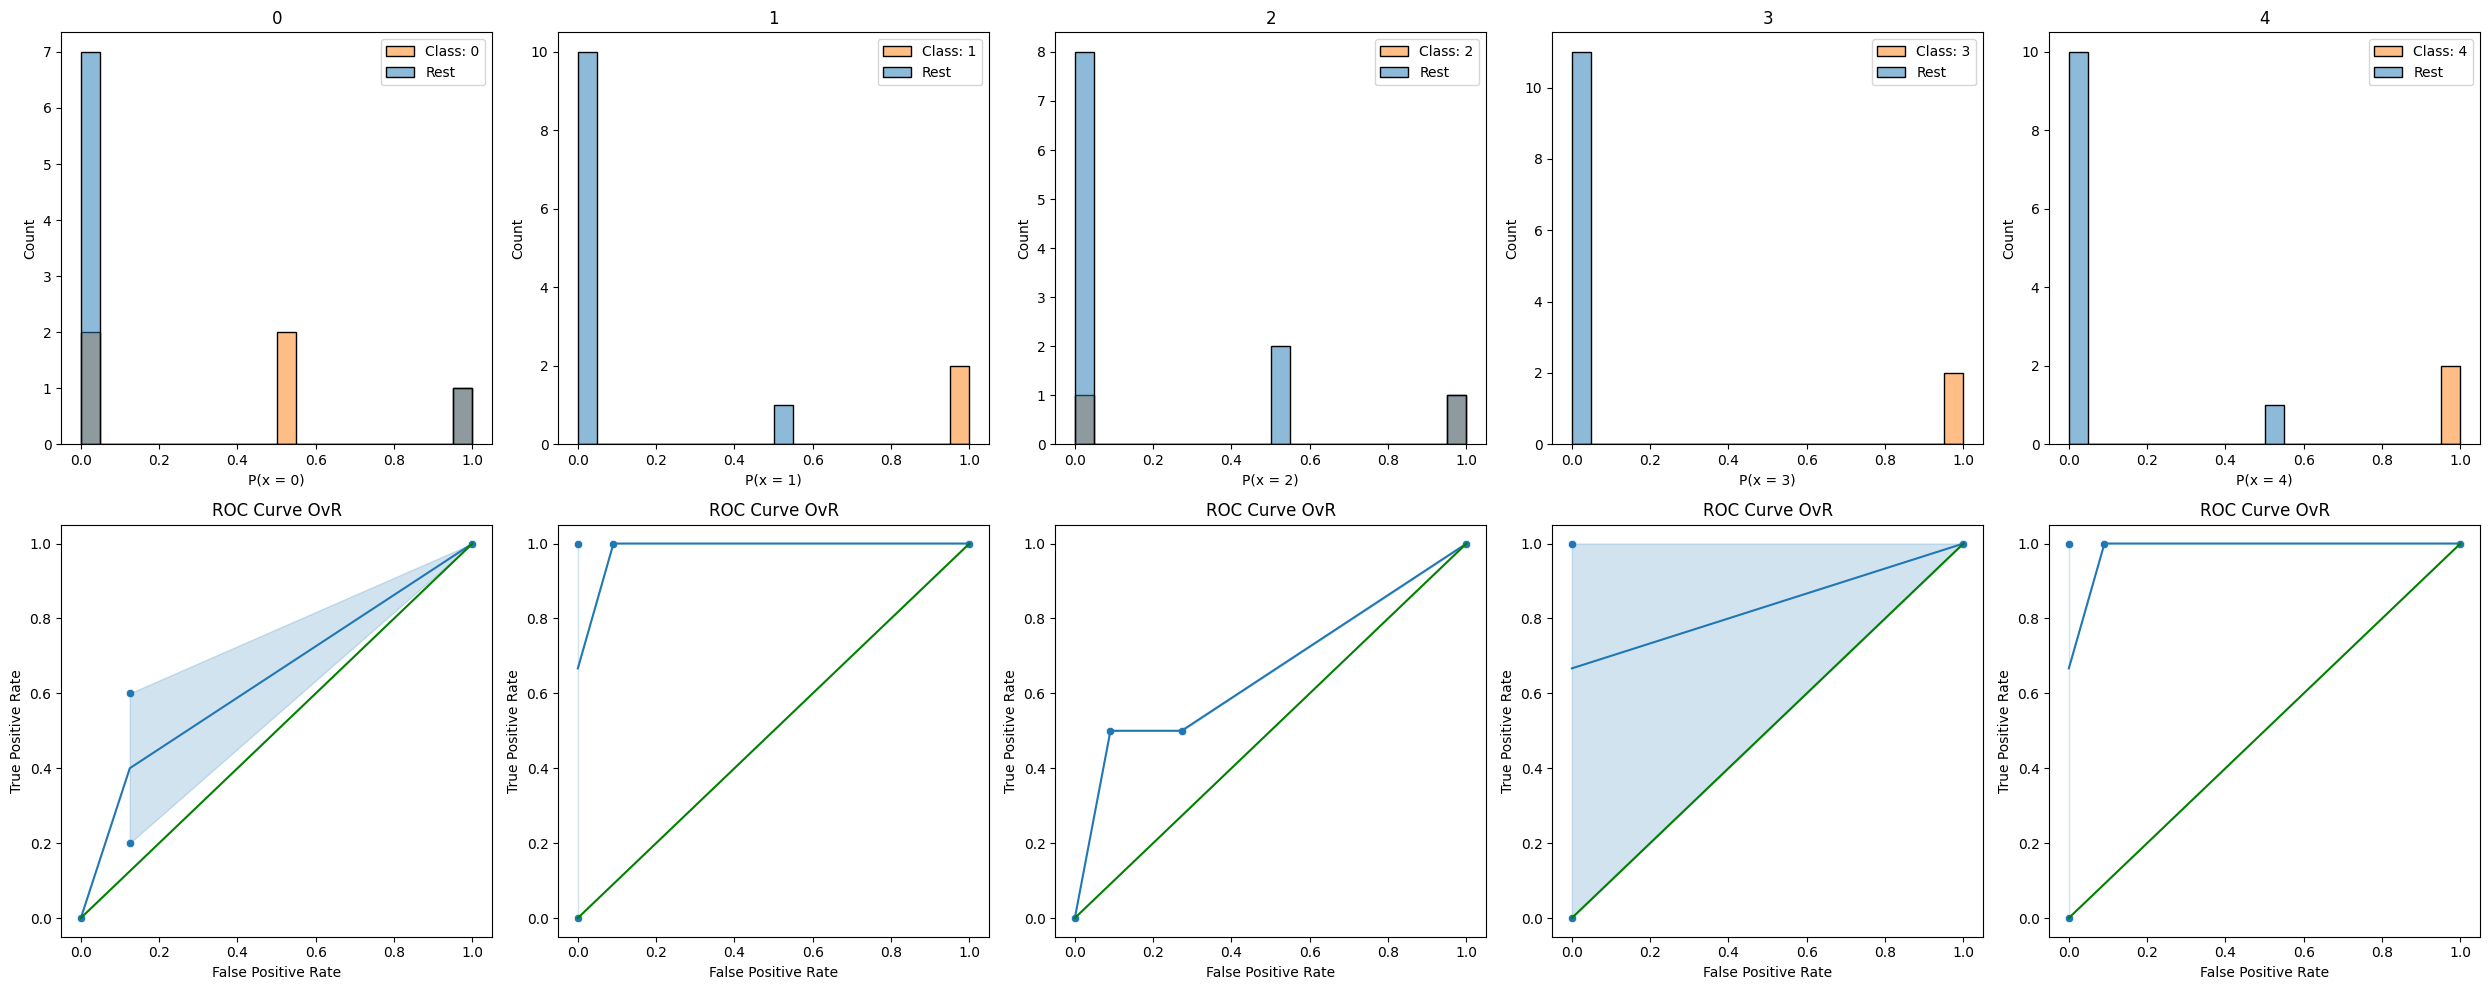

In [95]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = estimator.best_estimator_.predict(X_test_norm)
y_proba = estimator.best_estimator_.predict_proba(X_test_norm)
print("tacnost: %.4f" % accuracy_score(Y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in Y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 0.6154
Histogrami i ROC krive:


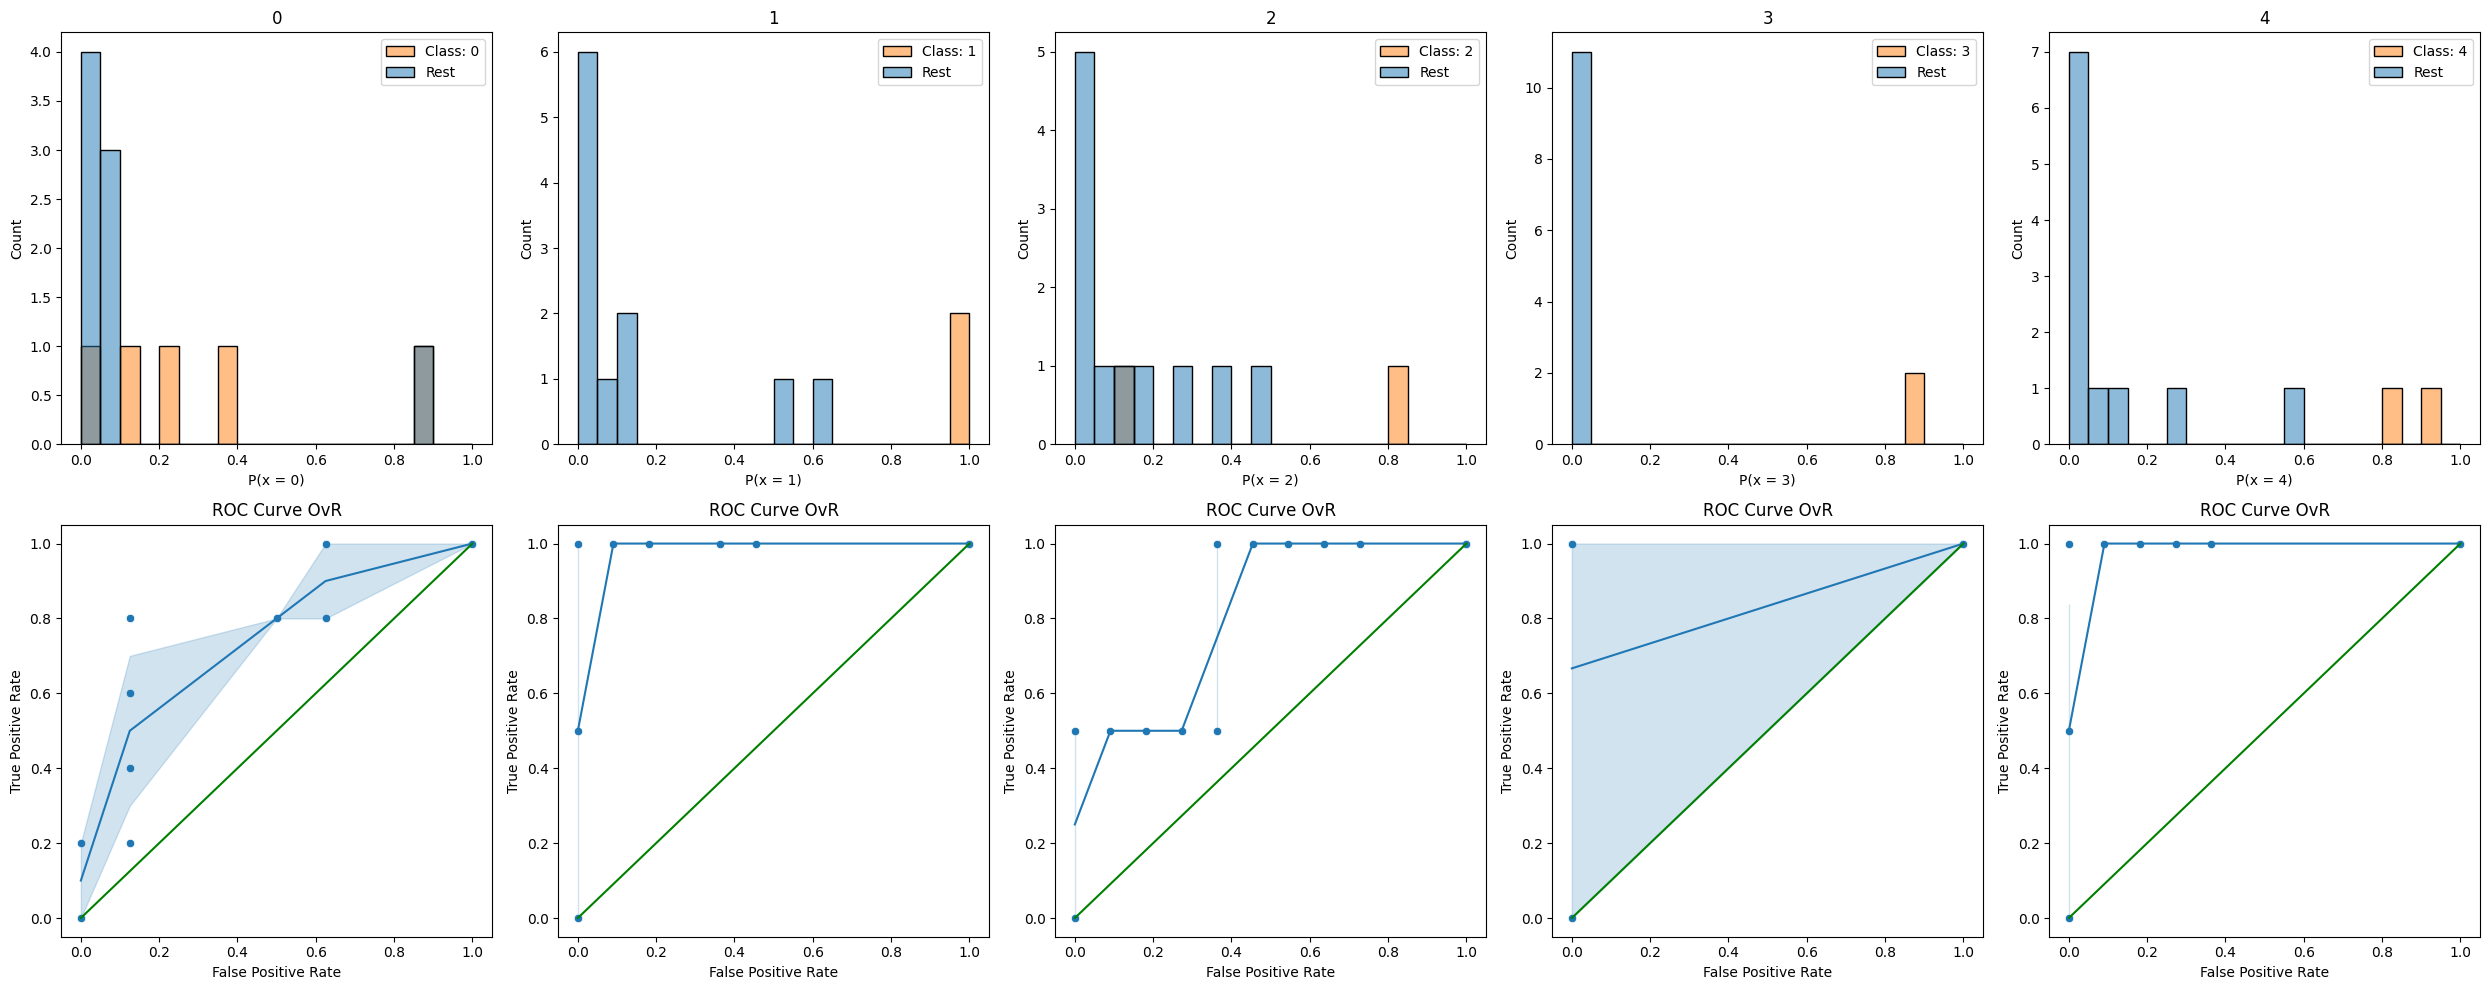

In [96]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = baggingKnn.predict(X_test_norm)
y_proba = baggingKnn.predict_proba(X_test_norm)
print("tacnost: %.4f" % accuracy_score(Y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in Y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

Najbolje sto smo uspeli da postignemo je KNN algoritam sa podesenim hiperaprametrima pomocu GridSearchCV